# Завдання на лабораторну роботу 7
**Дослідження та візуалізація даних за допомогою Python**

## Мета
Отримати базові навики використання Python для дослідження та візуалізації даних.

## Завдання
1. **Встановіть** Jupyter Notebook через `pip` або Anaconda Distribution.  
2. **Завантажте** файл `russia_losses_equipment.csv` із сайту [Kaggle.com](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war).  
3. **Виберіть** один варіант для цієї лабораторної роботи, використовуючи формулу  
   \[
   N = ord("LLL") % 3 + 1,
   \]  
   де \(N\) — це номер варіанту, \(LLL\) — перша літера вашого прізвища.
4. **Поради:**
   1. Використовуйте `csv.reader()` для читання файлу CSV.
   2. Пропустіть перший рядок (із заголовками стовпців).
   3. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів `numpy`. Застосовуйте лише зрізи та/або універсальні (векторизовані) функції.
   4. Створіть функції для завдань **3–7** кожного варіанта.

5. **Вимоги до графіків:**
   1. Встановити тип лінії (пунктирна, штрихпунктирна тощо).
   2. Графіки повинні бути підписані.
   3. Додайте легенду.
   4. Додати сітку та вказати колір і тип ліній.
   5. Додайте назву графіку, позначки осей і значення на осях.
   6. Змінити розмір графіку (наприклад, `8x16` дюймів) і розподільну здатність (наприклад, `100 dpi`).
   7. Зберегти графік у файл формату `png`.

---

## Варіант 1. Дослідження втрат літаків
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр і повертає масив зі значеннями стовпця.  
   *Assoc. prof. Svitlana Kovalenko, SEMIT dept.*
2. Використовуючи функцію з попереднього завдання, створіть масив `numpy` зі значень стовпця «літак».
3. Знайдіть добові втрати літаків.
4. Знайдіть 3 найбільші добові втрати літаків.
5. Визначте, скільки літаків було збито влітку 2022 року.
6. Знайдіть середнє значення втрат авіації за останні 300 днів війни.
7. Створіть графік втрат літаків за перший рік війни (починаючи з першої дати в наборі даних).


**1. Імпорт бібліотек**

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


**2. Опис допоміжних функцій**

In [8]:
def read_column_from_csv(filename, column_name):
    
    with open(filename, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)  
        
        if column_name not in header:
            raise ValueError(f"Стовпець '{column_name}' не знайдено у CSV.")
        col_index = header.index(column_name)
        
        data_list = []
        for row in reader:
            if len(row) > col_index:
                val = row[col_index].strip()
                if val == '':
                    val = '0'
                data_list.append(val)
            else:
                data_list.append('0')
                
        data_array = np.array(data_list, dtype=float)
        
        return data_array


def read_dates_from_csv(filename):
    
    with open(filename, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        if 'date' not in header:
            raise ValueError("Стовпець 'date' не знайдено у CSV.")
        date_index = header.index('date')
        
        date_list = []
        for row in reader:
            if len(row) > date_index:
                date_str = row[date_index].strip()
                try:
                    dt = datetime.strptime(date_str, '%Y-%m-%d')
                except ValueError:
                    dt = None
                date_list.append(dt)
            else:
                date_list.append(None)
        
        return np.array(date_list, dtype='O')  


def get_aircraft_array(filename):
  
    return read_column_from_csv(filename, 'aircraft')


def get_daily_losses(aircraft_array):
    
    diff_arr = np.diff(aircraft_array) * (-1.0)
    return diff_arr


def get_three_biggest_losses(daily_losses_array):
    
    sorted_arr = np.sort(daily_losses_array)
    three_biggest = sorted_arr[-3:]
    return three_biggest


def get_summer_2022_losses(dates_array, daily_losses_array):
    
    start_summer = datetime(2022, 6, 1)
    end_summer = datetime(2022, 8, 31)
    
    shifted_dates = dates_array[1:]
    mask_summer = (shifted_dates >= start_summer) & (shifted_dates <= end_summer)
    
    summer_losses = np.sum(daily_losses_array[mask_summer])
    return summer_losses


def get_avg_losses_last_300_days(dates_array, daily_losses_array):
    
    last_date = dates_array[-1]
    if last_date is None:
        raise ValueError("Остання дата у файлі некоректна (None).")
    
    start_300 = last_date - timedelta(days=299)
    
    shifted_dates = dates_array[1:]
    mask_300 = shifted_dates >= start_300
    
    selected_losses = daily_losses_array[mask_300]
    if selected_losses.size == 0:
        return 0.0
    return np.mean(selected_losses)


def plot_first_year_losses(dates_array, aircraft_array):
    
    start_date = datetime(2022, 2, 25)
    end_date = datetime(2023, 2, 24)
    
    daily_losses_arr = get_daily_losses(aircraft_array)
    shifted_dates = dates_array[1:]
    
    mask_year = (shifted_dates >= start_date) & (shifted_dates <= end_date)
    x_dates = shifted_dates[mask_year]
    y_losses = daily_losses_arr[mask_year]
    
    plt.figure(figsize=(10, 5))
    plt.plot(x_dates, y_losses, 'r--', label='Добові втрати літаків')
    plt.title("Втрати літаків за перший рік війни (25.02.2022 - 24.02.2023)", 
              fontsize=12, fontweight='bold')
    plt.xlabel("Дата (рік-місяць-день)", fontsize=10)
    plt.ylabel("Кількість збитих літаків за день", fontsize=10)
    plt.grid(True, linestyle=':', color='gray')
    plt.legend()
    plt.gcf().autofmt_xdate()
    
    plt.savefig("aircraft_losses_first_year.png", dpi=100)
    """plt.close()"""
    plt.show()


**3. зчитування файлу, обчислення, вивід результатів**


Три найбільші добові втрати літаків: [ 9. 16. 17.]
Загалом збито літаків за літо 2022 (01.06.22 - 31.08.22): 26.0
Середні втрати літаків за останні 300 днів війни: 0.3505859375


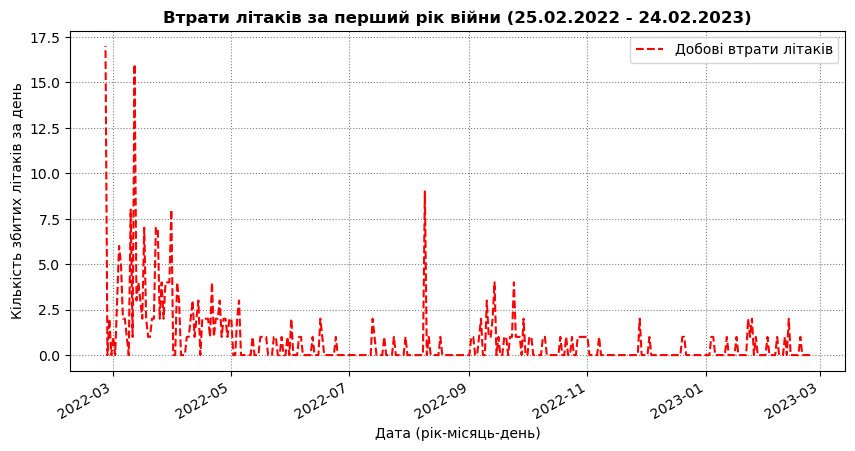

Графік 'aircraft_losses_first_year.png' збережено.


In [10]:
csv_filename = "russia_losses_equipment.csv"

dates_np = read_dates_from_csv(csv_filename)
aircraft_np = get_aircraft_array(csv_filename)

daily_losses_np = get_daily_losses(aircraft_np)

# 1) Три найбільші добові втрати
three_largest = get_three_biggest_losses(daily_losses_np)
print("Три найбільші добові втрати літаків:", three_largest)

# 2) Скільки літаків було збито влітку 2022 року
summer_2022 = get_summer_2022_losses(dates_np, daily_losses_np)
print("Загалом збито літаків за літо 2022 (01.06.22 - 31.08.22):", summer_2022)

# 3) Середні втрати за останні 300 днів (від останньої дати у файлі)
avg_300_days = get_avg_losses_last_300_days(dates_np, daily_losses_np)
print("Середні втрати літаків за останні 300 днів війни:", avg_300_days)

# 4) Побудова графіка за перший рік
plot_first_year_losses(dates_np, aircraft_np)
print("Графік 'aircraft_losses_first_year.png' збережено.")
